# 3.1. Linear Regression

In [10]:
%matplotlib inline
import math
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l

## 3.1.2. Vectorization for Speed

In [4]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.zeros(n)

In [5]:
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.05469 sec'

In [6]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00100 sec'

## 3.1.3. The Normal Distribution and Squared Loss

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [7]:
# normal distribution
def normal_distribution(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

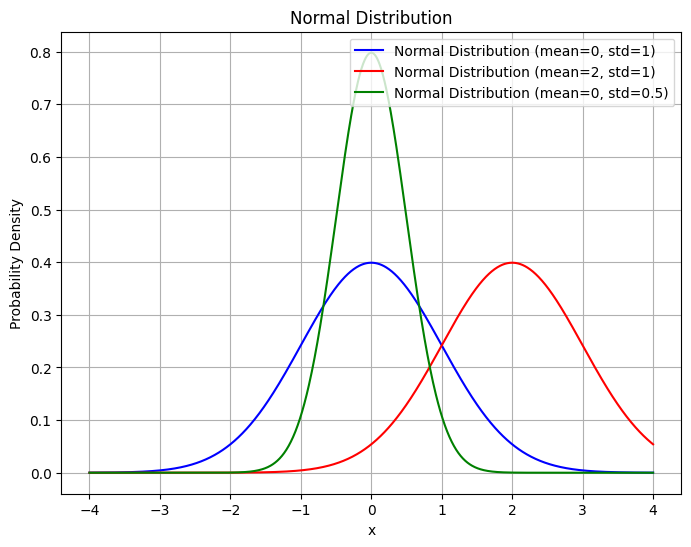

In [14]:
# data generating
x = np.linspace(-4, 4, 1000)
y0 = normal_distribution(x, 0, 1)
y1 = normal_distribution(x, 2, 1)
y2 = normal_distribution(x, 0, 0.5)

# 绘制正态分布曲线
plt.figure(figsize=(8, 6))
plt.plot(x, y0, label='Normal Distribution (mean=0, std=1)', color='blue')
plt.plot(x, y1, label='Normal Distribution (mean=2, std=1)', color='red')
plt.plot(x, y2, label='Normal Distribution (mean=0, std=0.5)', color='green')

plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# TODO 关于最大似然还是需要复习

## 3.1.4. Linear Regression as a Neural Network

## 3.1.6. Exercises

1. 假设我们有一些数据，$x_1....x_n$，这些数据都是实数。我们的目标是找到一个常数b，使得$\sum_{i=1}^n (x_i - b)^2$最小。

损失函数为$f(b) = \sum_{i=1}^n (x_i - b)^2$，求b，使得f(x)最小，则对b求导。

$$  \frac{df(b)}{db} = -2 \sum_{i=1}^n x_i + 2n b $$

f(b)连续，所以令导数为零。求得$ b = \frac{1}{n} \sum_{i=1}^n x_i $，也即b为x的平均值。